# Extended Sources

So far we have considered earthquakes as point source of seismic energy.  This is clearly incorrect, and for moderate to
large magnitude earthquakes, the difference between point sources and the true earthquake source can be resolvable with
seismic data.  When we considered earthquake location, we were thinking about the earthquakes hypocentre: where the
earthquake started.  Another commonly used "point on a map" type location is the centroid location: the centre of an
earthquakes energy release.

This topic is mostly covered by the reading highlighted in the text below.

## Source-time functions

Earthquakes occur over some finite time. So far we have calculated the origin-time when locating earthquakes. The origin time is the time
the earthquake rupture began. Earthquakes (in the crust) generally involve slip on faults and the time it takes for the fault to rupture
is known as the rupture duration. The rupture duration is controlled by the length of the fault and the rupture velocity. In general the
rupture velocity is 70-80% of the shear wave velocity, but in some cases (so-called supershear ruptures) the rupture velocity is higher
than the shear wave velocity.  In these cases mach waves are created, as shown in the figure below from 
[Xia et al., 2004](https://science.sciencemag.org/content/303/5665/1859).

<img alt="Supershear (Xia et al)" align="center" style="width:60%" src="https://science.sciencemag.org/content/sci/303/5665/1859/F2.large.jpg">

Alongside finite rupture velocities (and therefore rupture durations), faults do not instantly switch from static to slipping at their maximum
slip speed. The time associated with this is known as the rise time. In a simple Haskell source model the rise time is characterised as a simple
ramp function. The convolution of the resulting boxcars characterised by rupture time and rise time result in a trapezoidal source-time or moment-rate
function.

<img alt="Stein and Wysession Fig 4.3-3" align="centre" style="width:40%" src="http://levee.wustl.edu/seismology/book/chapter4/chap4_sr/4_3_03_s.jpg">

Note that this provides a simple explanation of rupture directivity effects. If the rupture is towards a recording site, the displacement pulses
are shortened by amplified, whereas the reverse happens if the rupture direction is away from the recording site. This is similar to a Doppler
effect. You can see this effect in the [simulation of shaking due to Kaikoura](https://www.youtube.com/watch?v=z1HWet9j070) by Yoshi Kaneko
at GNS Science.

You should read section 4.3.2 of Stein and Wysession for more information on source-time functions.

The result of this on the seismic spectra can be modeled using sinc functions. Section 4.6.2 of Stein and Wysession provides a 
good description of this. The resulting spectra have two corners, as seen in the spectra in [the magnitudes notebook](4_magnitudes.ipynb).
The code below makes a simple model of the resulting spectra, you can play around with the different parameters to see what effect it would
have on the spectra.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np

def haskell(M0, Tr, Td, freqs, plot=True):
    """
    Compute the Haskell source spectrum for given parameters
    
    :type M0: float
    :param M0: Seismic moment
    :type Tr: float
    :param Tr: Rupture time in seconds
    :type Td: float
    :param Td: Rise time in seconds
    :type freqs: `numpy.ndarray`
    :param freqs: Frequencies to calculate for
    
    :returns: freqs, amplitudes
    """
    amplitudes = np.zeros_like(freqs)
    # Below first corner
    amplitudes[np.where(freqs < 2 / Tr)] = np.log10(M0)
    # Between first and second coreners
    amplitudes[(2 / Tr <= freqs) & (freqs < 2 / Td)] = (
        np.log10(M0) - np.log10(Tr / 2) -
        np.log10(freqs[(2 / Tr <= freqs) & (freqs < 2 / Td)]))
    # Above second corner
    amplitudes[(2 / Td <= freqs)] = (
        np.log10(M0) - np.log10(Tr * Td / 4) -
        2 * np.log10(freqs[(2 / Td <= freqs)]))    
    # Above is for log amplitudes, convert to amplitudes
    amplitudes = 10 ** amplitudes
    if plot:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
        ax.loglog(freqs, amplitudes)
        ax.axvline(2 / Tr, color="b", linestyle="--", label="$2 / T_r$")
        ax.axvline(2 / Td, color="k", linestyle="--", label="$2 / T_d$")
        ax.legend()
        return fig, freqs, amplitudes
    return freqs, amplitudes

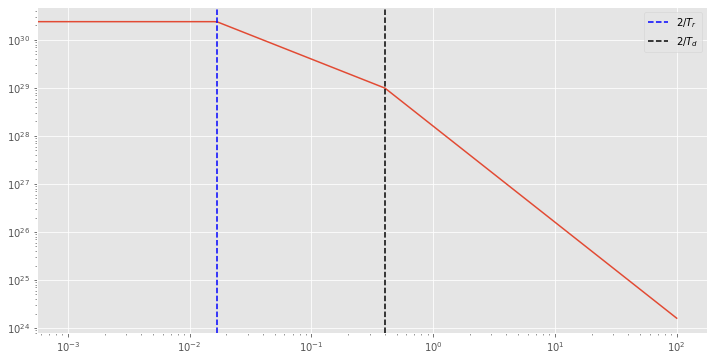

In [2]:
freqs = np.arange(0, 100, 0.001)
fig, freqs, amplitudes = haskell(2.4e30, 120, 5, freqs, plot=True)

## Stress drop and source properties

Stress drop is the term used to describe the stress released in an earthquake. Section 4.6.3 of Stein and Wysession discusses this and you should
read this section. Accurate estimation of stress drop, rupture direction and rupture velocity remains difficult, particularly in separating the
source and path effects. One method is to use small earthquakes located nearby the earthquake of interest as an *empirical Green's function* and
deconvolve this from the earthquake of interest (e.g. [Hough 1997](https://agupubs.onlinelibrary.wiley.com/doi/pdf/10.1029/96JB03488)).

## A real example: Kaikoura

The 2016 M7.8 Kaikoura earthquake is a good example of an earthquake that obviously isn't a point source. More than 14 (possibly more than 20) faults were
ruptured during the earthquake, and the influence of the subduction interface is still being debated in the scientific literature. Modelling such a complex
source with disparate data has proven to be an interesting problem. You should read the following papers, focusing on the data used, methods and final models:
- [Hamling et al., 2017](https://science.sciencemag.org/content/356/6334/eaam7194.abstract);
- [Bai et al., 2017](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2017GL073717);
- [Holden et al., 2017](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2017GL075301)

and consider the how the different methods used to model the earthquake source have provided different models.